In [1]:
import pandas as pd
df = pd.read_csv('data_banknote_authentication.txt', header=None)
cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df.columns = cols

In [2]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


c:\users\aman sharif\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


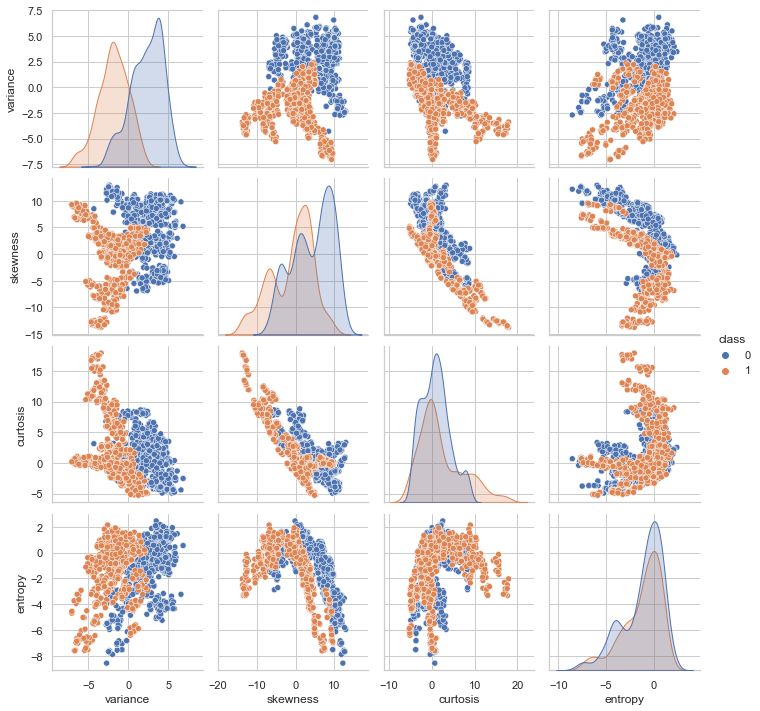

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(df.dropna(), size =2.5, hue = 'class')

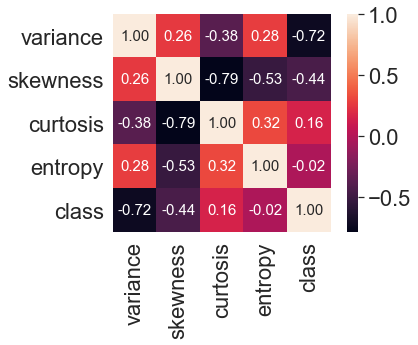

In [6]:
import numpy as np
cm = np.corrcoef(df.values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)

In [7]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=25):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [8]:
X = df[['variance']].values
y = df['class'].values

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

In [10]:
lr = LinearRegressionGD()
lr.fit(X_std, y)

In [11]:
print('Slope: %.3f' % lr.w_[1])

Slope: -0.360


In [12]:
print('Intercept: %.3f' % lr.w_[0])

Intercept: 0.445


In [13]:
 new_val = 0.32924
new_class = lr.predict(new_val)
print("Class is %d" %new_class)

Class is 0


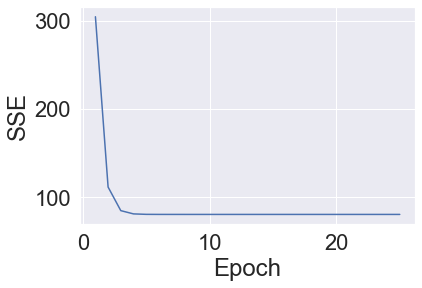

In [14]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [15]:
def reg_plot(X,y,model):
    plt.scatter(X,y, c = 'blue')
    plt.plot(X,model.predict(X),color = 'red')
    return None

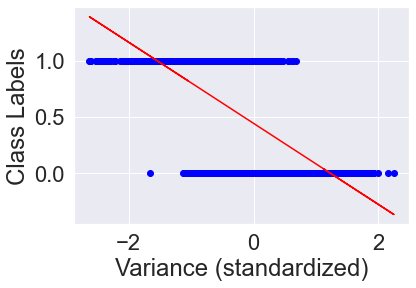

In [16]:
reg_plot(X_std, y, lr)
plt.xlabel('Variance (standardized)')
plt.ylabel('Class Labels')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)

LinearRegression()

In [18]:
print('Slope: %.3f' % slr.coef_[0])

Slope: -0.127


In [19]:
print('Intercept: %.3f' % slr.intercept_)

Intercept: 0.500


In [20]:
new_val = 0.32924
new_class = slr.predict([[new_val]])
print("Class is %d" %new_class)

Class is 0


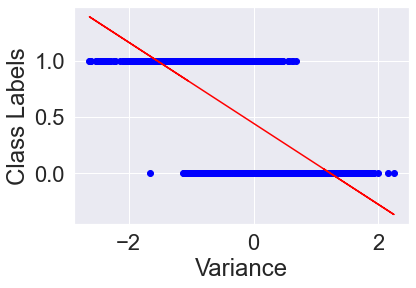

In [21]:
reg_plot(X_std, y, lr)
plt.xlabel('Variance')
plt.ylabel('Class Labels')
plt.show()

In [22]:
slr.score(X,y)

0.5253975811489711

In [23]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,residual_threshold=5.0,random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

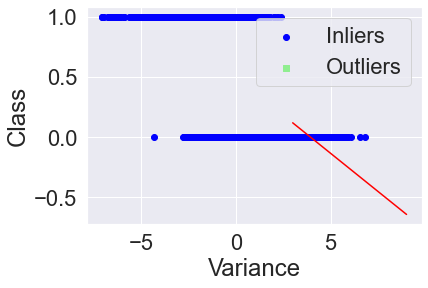

In [24]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Variance')
plt.ylabel('Class')
plt.legend(loc='upper right')
plt.show()

In [25]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])

Slope: -0.127


In [26]:
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Intercept: 0.500


In [27]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

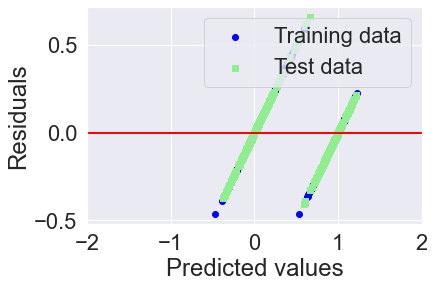

In [28]:
plt.scatter(y_train_pred, y_train_pred - y_train,c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-2, xmax=2, lw=2, color='red')
plt.xlim([-2, 2])
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

MSE train: 0.033, test: 0.035
